# Detecção de Possíveis Fraudes em Óbitos com Isolation Forest

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [2]:
# Carregar os dados
df = pd.read_csv('obitos_normalizados.csv')

In [3]:
# Selecionar colunas relevantes
X = df[['CD_DIST', 'NM_DIST', 'Sexo', 'Obitos']]

In [4]:
# Converter variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

In [5]:
# Tratar valores ausentes
X = X.fillna(0)

In [6]:
# Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Modelo de detecção de anomalias
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_scaled)

IsolationForest(contamination=0.05, random_state=42)

In [8]:
# Previsões: -1 = anomalia, 1 = normal
df['suspeita_fraude'] = model.predict(X_scaled)
df['suspeita_fraude'] = df['suspeita_fraude'].map({1: 0, -1: 1})

In [28]:
# Criar uma coluna que indica o número da linha original (1-base)
df['index'] = df.index + 1  # +2 para compensar o cabeçalho (linha 1) e index 0

In [29]:
# Mostrar registros suspeitos com número da linha original e contagem
suspeitos = df[df['suspeita_fraude'] == 1][[
    'index', 'CD_DIST', 'NM_DIST', 'Sexo', 'Obitos', 'suspeita_fraude'
]]
print(f"\nTotal de registros suspeitos: {len(suspeitos)}")
print("Registros suspeitos de fraude:")
print(suspeitos.to_string(index=False))


Total de registros suspeitos: 1568
Registros suspeitos de fraude:
 index   CD_DIST                         NM_DIST                        Sexo Obitos  suspeita_fraude
    36 110013025                        Tabajara                    Feminino      9                1
    70 110033820                       Palmeiras                    Feminino     16                1
   131 120080725                       Vila do V                    Feminino     23                1
   467 150715105        São Domingos do Araguaia                    Feminino    261                1
   532 160050115                      Vila Velha                    Feminino     13                1
   610 170980705                        Ipueiras                    Feminino      4                1
   640 171525905                     Novo Jardim                    Feminino     13                1
   654 171700805          Pindorama do Tocantins                    Feminino     38                1
   664 171845105        

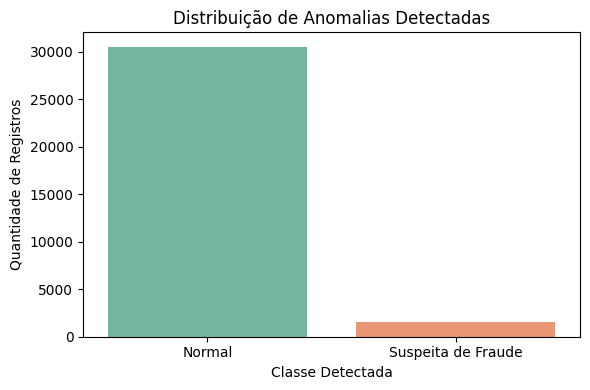

In [30]:
plt.figure(figsize=(6, 4))
sns.countplot(x='suspeita_fraude', hue='suspeita_fraude', data=df, palette='Set2', legend=False)
plt.xticks([0, 1], ['Normal', 'Suspeita de Fraude'])
plt.xlabel("Classe Detectada")
plt.ylabel("Quantidade de Registros")
plt.title("Distribuição de Anomalias Detectadas")
plt.tight_layout()
plt.show()

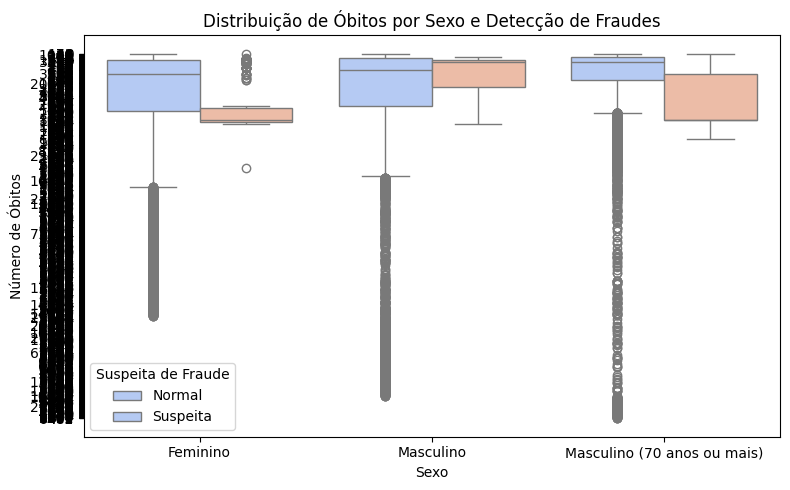

In [31]:
if 'Sexo' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Sexo', y='Obitos', hue='suspeita_fraude', data=df, palette='coolwarm')
    plt.xlabel("Sexo")
    plt.ylabel("Número de Óbitos")
    plt.title("Distribuição de Óbitos por Sexo e Detecção de Fraudes")
    plt.legend(title="Suspeita de Fraude", labels=["Normal", "Suspeita"])
    plt.tight_layout()
    plt.show()